# ÌÖçÏä§Ìä∏ ÎßàÏù¥Îãù
- ÌÖçÏä§Ìä∏Î°úÎ∂ÄÌÑ∞ Ï†ïÎ≥¥Î•º Ï∂îÏ∂úÌï¥ÎÇ¥Îäî Í∏∞Î≤ï

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Amazon_Unlocked_Mobile.csv")
df.head()

Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. The only...           0.0

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [76]:
# NaN ÌôïÏù∏
df.isna().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64

# ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ EDA

In [77]:
sns.set_theme(style = 'whitegrid', palette='pastel')

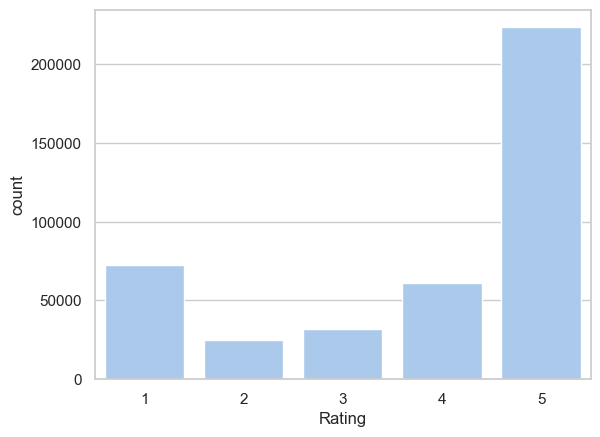

In [78]:
sns.countplot(data=df, x='Rating')
plt.show()

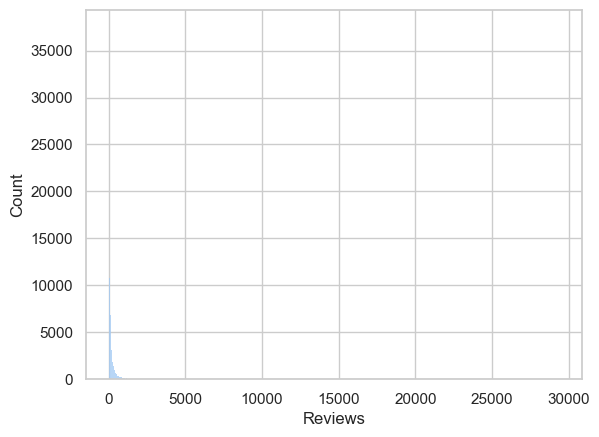

In [79]:
# Î¶¨Î∑∞ Í∏∏Ïù¥Ïùò Î∂ÑÌè¨ ÌôïÏù∏(Í∏ÄÏûêÏàò)
sns.histplot(df['Reviews'].dropna().map(len))
plt.show()

Îã§Î•∏ ÌÖçÏä§Ìä∏Ïóê ÎπÑÌï¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú Í∏¥ ÌÖçÏä§Ìä∏Î•º BOWÌôî ÏãúÌÇ§Î©¥, Ìù¨ÏÜåÌñâÎ†¨Ïù¥ Îß§Ïö∞ Ïã¨Í∞ÅÌïòÍ≤å ÎßåÎì§Ïñ¥Ïßà Í∞ÄÎä•ÏÑ±Ïù¥ ÏÉùÍπÄ

In [80]:
# Ï†úÏùº Í∏¥ Î¶¨Î∑∞Ïùò Í∏∏Ïù¥Îßå ÌôïÏù∏
df['Reviews'].dropna().map(len).max()

29419

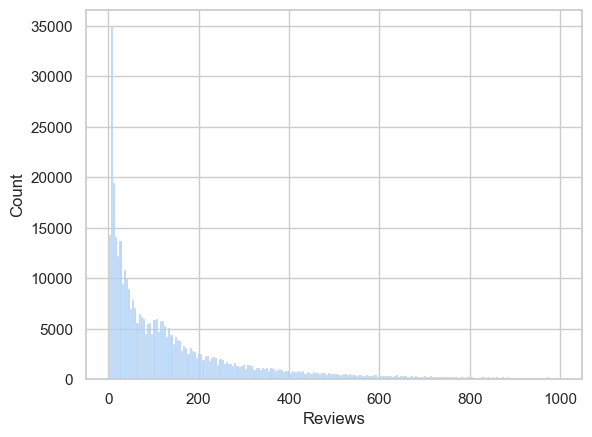

In [81]:
# 1000Í∏ÄÏûê ÎØ∏ÎßåÏùò Î¶¨Î∑∞Îßå ÏãúÍ∞ÅÌôî
reviews_chars = df['Reviews'].dropna().map(len)
reviews_chars_under_1000_msk = reviews_chars < 1000

sns.histplot(reviews_chars[reviews_chars_under_1000_msk])
plt.show()

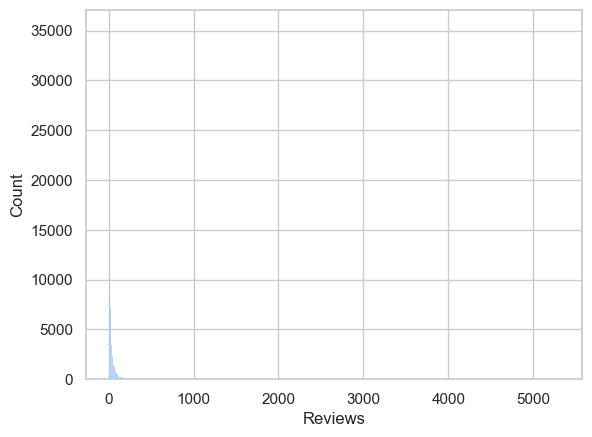

In [82]:
# Î¶¨Î∑∞ Îã®Ïñ¥Ïùò Í∞úÏàò - TokenizerÎ•º ÏÇ¨Ïö©.
sns.histplot(df['Reviews'].dropna().map(lambda x : len(x.split())))
plt.show()

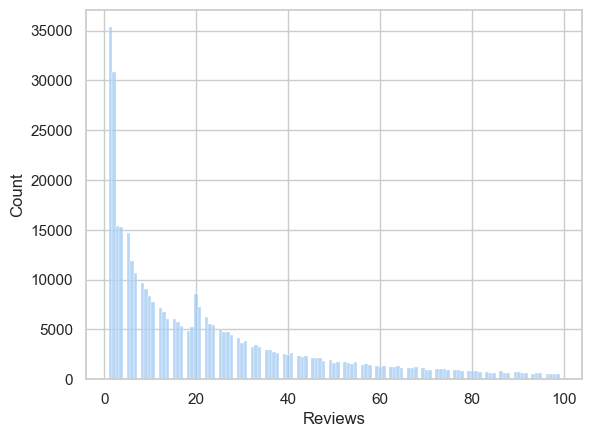

In [83]:
reviews_words = df['Reviews'].dropna().map(lambda x : len(x.split()))
reviews_words_under_100_mask = reviews_words < 100

sns.histplot(reviews_words[reviews_words_under_100_mask])
plt.show()

In [84]:
# Î¶¨Î∑∞Ïùò Í∏∏Ïù¥ÏôÄ Ìà¨Ìëú Ïàò(Review Vote)Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
df['Review Words'] = df['Reviews'].dropna().map(lambda x : len(x.split()))
df.head()

Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  \
0       5  I feel so LUCKY to have found this used (phone...           1.0   
1       4  nice phone, nice up grade from my pantach revu...           0.0   
2       5                                       Very pleased           0.0   
3       4  It works good but it goes slow sometimes but i...           0.0   
4       4  Great phone to replace my lost phone. The only...           0.0   

   Review Words  
0          72.0  
1          40.0  
2           2.0  
3          17.0  
4          43.0

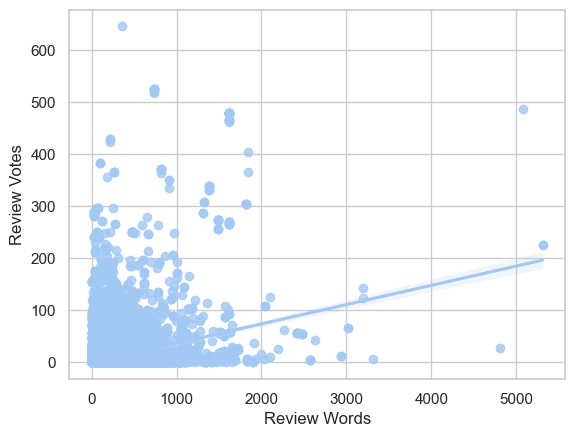

In [85]:
sns.regplot(x='Review Words', y='Review Votes', data=df)
plt.show()

In [86]:
# Ïï†ÌîåÍ≥º ÏÇºÏÑ±Ïùò ÌèâÍ∑† ÌèâÏ†ê
df[df['Brand Name'] == "Samsung"]['Rating'].mean()

3.9623556968378786

In [87]:
df[df['Brand Name'] == "Apple"]['Rating'].mean()

3.9244148076856975

# ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ - nltk

In [88]:
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
# Ï†ïÍ∑úÏãùÏúºÎ°ú ÌäπÏàòÎ¨∏Ïûê Îì± ÌïÑÏöîÏóÜÎäî Î∂ÄÎ∂ÑÎì§ÏùÄ Ï†úÍ±∞ (ÏòÅÏñ¥ Îã®Ïñ¥Îßå ÎÇ®Í∏∏ ÏòàÏ†ï)
import numpy as np

df['Reviews'] = df['Reviews'].str.replace("[^a-zA-Z ]", "").str.strip()

nan_idx = df['Reviews'].notnull()
df = df.loc[nan_idx]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413770 entries, 0 to 413839
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413770 non-null  object 
 1   Brand Name    348616 non-null  object 
 2   Price         407840 non-null  float64
 3   Rating        413770 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401474 non-null  float64
 6   Review Words  413770 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 25.3+ MB


In [90]:
over_2_index = df['Reviews'].map(len) > 2
df = df.loc[over_2_index]
df.head()

Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  \
0       5  I feel so LUCKY to have found this used (phone...           1.0   
1       4  nice phone, nice up grade from my pantach revu...           0.0   
2       5                                       Very pleased           0.0   
3       4  It works good but it goes slow sometimes but i...           0.0   
4       4  Great phone to replace my lost phone. The only...           0.0   

   Review Words  
0          72.0  
1          40.0  
2           2.0  
3          17.0  
4          43.0

In [91]:
df_sample = df.dropna().sample(frac=0.01)
df_sample.shape

(3325, 7)

In [92]:
# Wordcloud Î¨∏Ïû• ÎÇ¥ Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÎ•º ÏãúÍ∞ÅÌôî
#   Î™®Îì† Î¶¨Î∑∞Î•º ÌïòÎÇòÎ°ú Ïù¥Ïñ¥ÏÑú Î™®Îì† Î¶¨Î∑∞ ÎÇ¥Ïùò Îã®Ïñ¥ ÎπàÎèÑÏàò ÌôïÏù∏
all_reviews = ' '.join(df_sample['Reviews'])
all_reviews

'I loved it, so good Phone was not what I ordered, very disappointed. Will not order again. I was really mad at first because I thought I bought a broken phone. Phone works they gave me a charger that was no good After a recent bad experience with a different phone from another company, I was skeptical about trying another uncommon brand. I\'m very happy to say it has everything I wanted and so far it works perfectly. I\'m loving this phone, especially for the price! The only major downfall I\'ve found with this phone is that they don\'t make phone cases for it. However, I did order a belt clip case so I at least have somewhere to safely carry it. Everything ok No conecta bien .Agarra pobre se√±al. At first, the phone looks nice, and without the OTA update, can be used. After the system update, weird apps are automatically installed, demanding certain settings, which will bombard you with unwanted advertising and, weird communication to the Internet. The Chinese firmware doesn\'t make 

In [93]:
all_reviews_lower = all_reviews.lower()
all_reviews_lower

'i loved it, so good phone was not what i ordered, very disappointed. will not order again. i was really mad at first because i thought i bought a broken phone. phone works they gave me a charger that was no good after a recent bad experience with a different phone from another company, i was skeptical about trying another uncommon brand. i\'m very happy to say it has everything i wanted and so far it works perfectly. i\'m loving this phone, especially for the price! the only major downfall i\'ve found with this phone is that they don\'t make phone cases for it. however, i did order a belt clip case so i at least have somewhere to safely carry it. everything ok no conecta bien .agarra pobre se√±al. at first, the phone looks nice, and without the ota update, can be used. after the system update, weird apps are automatically installed, demanding certain settings, which will bombard you with unwanted advertising and, weird communication to the internet. the chinese firmware doesn\'t make 

In [94]:
nltk.download('punkt_tab')

all_reviews_tokens = nltk.word_tokenize(all_reviews_lower)
all_reviews_tokens[:10]

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['i', 'loved', 'it', ',', 'so', 'good', 'phone', 'was', 'not', 'what']

In [95]:
# Î∂àÏö©Ïñ¥ Ï†úÍ±∞
all_reviews_tokens_clean =  [token for token in all_reviews_tokens if token not in stopwords.words("english")]
all_reviews_tokens_clean[:10]

['loved',
 ',',
 'good',
 'phone',
 'ordered',
 ',',
 'disappointed',
 '.',
 'order',
 '.']

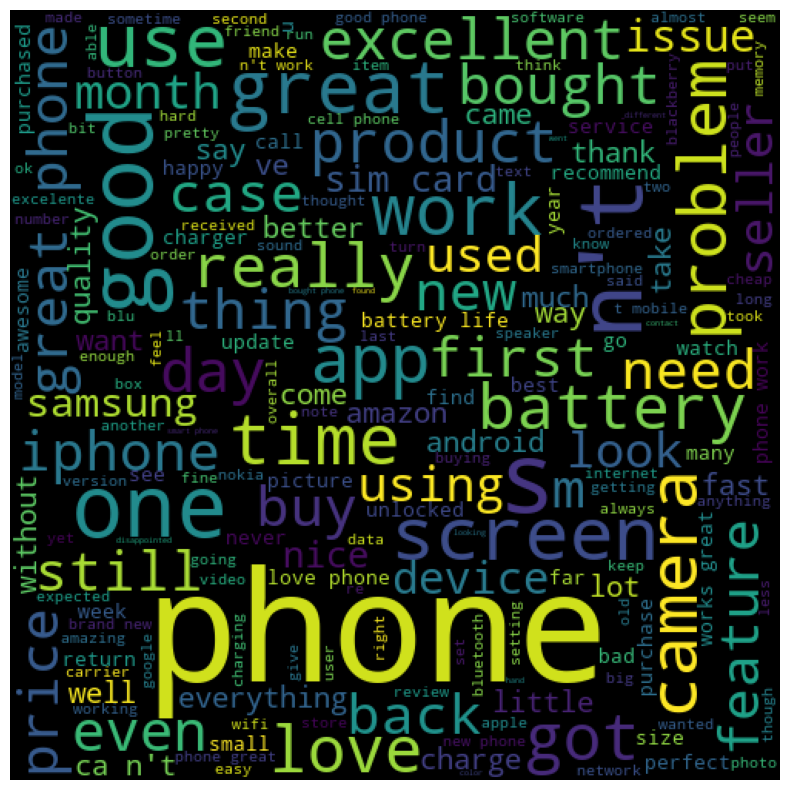

In [96]:
from wordcloud import WordCloud

# ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎäî Í∞íÏù¥ ÌÅ∞ Î¶¨Î∑∞Ïóê ÎåÄÌï¥ÏÑú Í∏ÄÏî® ÌÅ¨Í∏∞Î•º ÌÅ¨Í≤å ÏÑ§Ï†ï, Í∞íÏù¥ Ï†ÅÏùÄ Î¶¨Î∑∞Îäî ÏûëÍ≤å ÏÑ§Ï†ï
wc = WordCloud(max_font_size=100, width=500, height=500)

all_reviews_wc = wc.generate(' '.join(all_reviews_tokens_clean))

plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(all_reviews_wc)
plt.show()

In [97]:
# ÏõåÎìú ÌÅ¥ÎùºÏö∞ÎìúÎ•º Ïó¨Îü¨Î≤à Í∑∏Î¶¨Î©¥ÏÑú Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ïÏùÑ Í∞ÑÏÜåÌôî ÌïòÍ∏∞ ÏúÑÌï¥ Ìï®ÏàòÎ°ú ÎßåÎì§Ïñ¥ ÎÜìÍ∏∞
def clean_reviews(df):

  # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùò Î¶¨Î∑∞Î•º ÌïòÎÇòÏùò Î¨∏ÏûêÏó¥Î°ú Ïù¥Ïñ¥Ï£ºÍ∏∞
  reviews = ' '.join(df['Reviews'])

  # ÏÜåÎ¨∏ÏûêÌôî ÏàòÌñâ
  reviews_lower = reviews.lower()

  # ÌÜ†ÌÅ∞Ìôî
  reviews_tokens = nltk.word_tokenize(reviews_lower)

  # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
  reviews_tokens_clean = [ token for token in reviews_tokens if token not in stopwords.words("english") ]

  return reviews_tokens_clean

def draw_wordcloud(df):
  global wc

  # Ï†ÑÏ≤òÎ¶¨Í∞Ä ÏôÑÎ£åÎêú ÌÜ†ÌÅ∞ ÏñªÏñ¥ÎÇ¥Í∏∞
  reviews_tokens_clean = clean_reviews(df)

  # ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Í∑∏Î¶¨Í∏∞(Ïù¥ÎØ∏ÏßÄ Î∞õÍ∏∞)
  reviews_wc = wc.generate(' '.join(reviews_tokens_clean))

  return reviews_wc

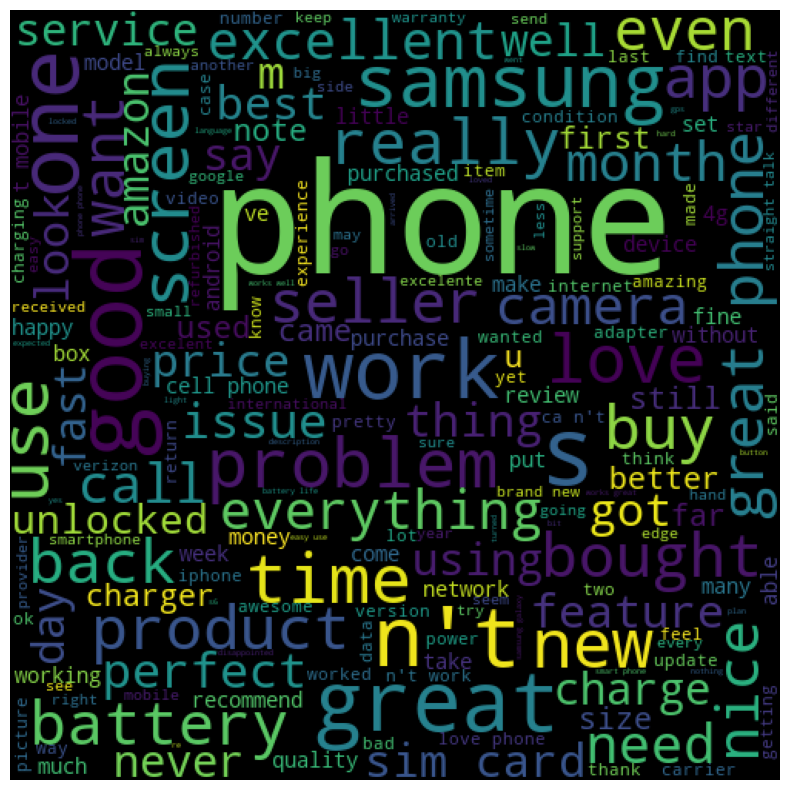

In [98]:
#ÏÇºÏÑ± Ìè∞Ïóê ÎåÄÌï¥ÏÑúÎßå ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
df_samsung = df_sample[df_sample["Brand Name"] == "Samsung"]

samsung_review_wc = draw_wordcloud(df_samsung)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(samsung_review_wc)
plt.show()

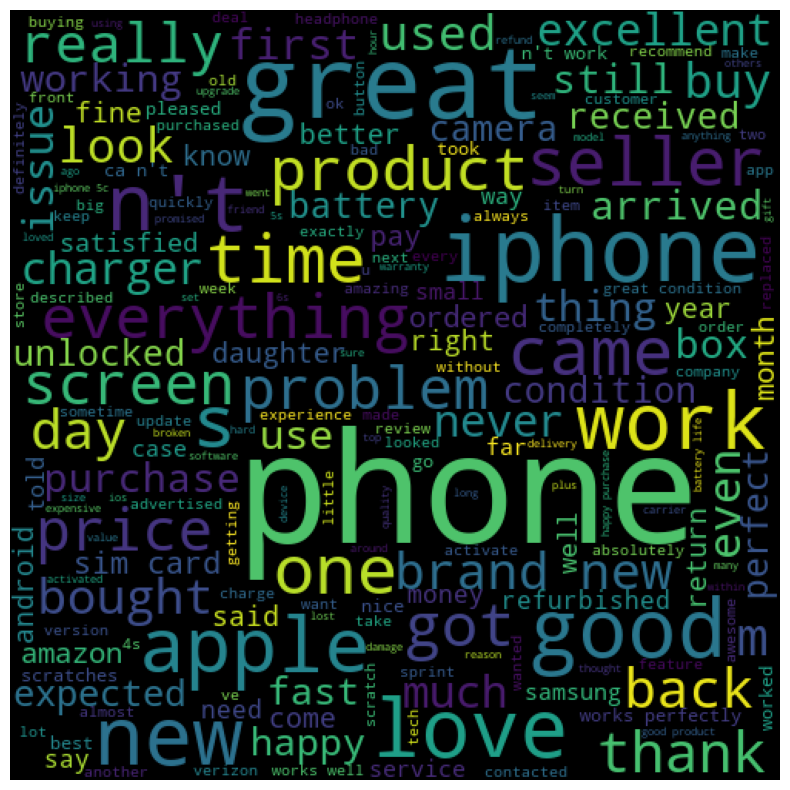

In [99]:
#ÏÇºÏÑ± Ìè∞Ïóê ÎåÄÌï¥ÏÑúÎßå ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
df_samsung = df_sample[df_sample["Brand Name"] == "Apple"]

samsung_review_wc = draw_wordcloud(df_samsung)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(samsung_review_wc)
plt.show()

# Spacy ÏÇ¨Ïö©ÌïòÍ∏∞

In [100]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [101]:
# pip install spacy
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load('en_core_web_sm')

‚úî Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [102]:
test_sentence = """I'm at a payphone, trying to call home. All of my change I spent on you. Where have the times gone.. Baby, it's all wrong. Where are the plans we made for two."""

In [103]:
# nlpÏóê Î¨∏ÏÑú(Î¨∏Ïû•)ÏùÑ ÏßëÏñ¥ ÎÑ£Ïñ¥ÏÑú docÏóêÏÑú Ï≤òÎ¶¨ÌïúÎã§.
doc = nlp(test_sentence)
doc.text # ÏõêÎ≥∏ Î¨∏Ïû• ÌôïÏù∏

"I'm at a payphone, trying to call home. All of my change I spent on you. Where have the times gone.. Baby, it's all wrong. Where are the plans we made for two."

In [104]:
# docÍ∞Ä Í∞ÄÏßÄÍ≥† ÏûàÎäî Ï†ïÎ≥¥Îäî Îã®Ïñ¥ Ï†ïÎ≥¥
for word_token in doc:
    print("word : {}\t\tPOS : {}\t\tLemma : {}".format(word_token.text, word_token.pos_, word_token.lemma_))

word : I		POS : PRON		Lemma : I
word : 'm		POS : AUX		Lemma : be
word : at		POS : ADP		Lemma : at
word : a		POS : DET		Lemma : a
word : payphone		POS : NOUN		Lemma : payphone
word : ,		POS : PUNCT		Lemma : ,
word : trying		POS : VERB		Lemma : try
word : to		POS : PART		Lemma : to
word : call		POS : VERB		Lemma : call
word : home		POS : ADV		Lemma : home
word : .		POS : PUNCT		Lemma : .
word : All		POS : PRON		Lemma : all
word : of		POS : ADP		Lemma : of
word : my		POS : PRON		Lemma : my
word : change		POS : NOUN		Lemma : change
word : I		POS : PRON		Lemma : I
word : spent		POS : VERB		Lemma : spend
word : on		POS : ADP		Lemma : on
word : you		POS : PRON		Lemma : you
word : .		POS : PUNCT		Lemma : .
word : Where		POS : SCONJ		Lemma : where
word : have		POS : AUX		Lemma : have
word : the		POS : DET		Lemma : the
word : times		POS : NOUN		Lemma : time
word : gone		POS : VERB		Lemma : go
word : ..		POS : PUNCT		Lemma : ..
word : Baby		POS : PROPN		Lemma : Baby
word : ,		POS : PUNCT		Lemma :

In [105]:
# docÍ∞Ä Í∞ÄÏßÄÍ≥† ÏûàÎäî Ï†ïÎ≥¥Îäî Îã®Ïñ¥ Ï†ïÎ≥¥
for word_token in doc:
    print("word : {}\t\tPOS : {}\t\tLemma : {}".format(word_token.text, word_token.pos_, word_token.lemma_))

word : I		POS : PRON		Lemma : I
word : 'm		POS : AUX		Lemma : be
word : at		POS : ADP		Lemma : at
word : a		POS : DET		Lemma : a
word : payphone		POS : NOUN		Lemma : payphone
word : ,		POS : PUNCT		Lemma : ,
word : trying		POS : VERB		Lemma : try
word : to		POS : PART		Lemma : to
word : call		POS : VERB		Lemma : call
word : home		POS : ADV		Lemma : home
word : .		POS : PUNCT		Lemma : .
word : All		POS : PRON		Lemma : all
word : of		POS : ADP		Lemma : of
word : my		POS : PRON		Lemma : my
word : change		POS : NOUN		Lemma : change
word : I		POS : PRON		Lemma : I
word : spent		POS : VERB		Lemma : spend
word : on		POS : ADP		Lemma : on
word : you		POS : PRON		Lemma : you
word : .		POS : PUNCT		Lemma : .
word : Where		POS : SCONJ		Lemma : where
word : have		POS : AUX		Lemma : have
word : the		POS : DET		Lemma : the
word : times		POS : NOUN		Lemma : time
word : gone		POS : VERB		Lemma : go
word : ..		POS : PUNCT		Lemma : ..
word : Baby		POS : PROPN		Lemma : Baby
word : ,		POS : PUNCT		Lemma :

In [106]:
from tqdm import tqdm

under_100_words_mask = df_sample.dropna()['Review Words'] < 100
df_sample_under_100 = df_sample[under_100_words_mask]
df_sample_under_100

Product Name Brand Name   Price  \
110502   BLU Dash JR 4.0 K Smartphone - Unlocked - Silver        BLU  125.00   
75002   Apple iPhone SE Unlocked Phone - 64 GB Retail ...      Apple  514.98   
42583                  Apple iPhone 5s 32GB (Gold) - AT&T      Apple   54.34   
409170  verykool Jet SL5009 manufacture unlocked GSM s...   verykool  103.98   
353699  Samsung Galaxy S5 Mini G800H Unlocked Cellphon...    Samsung  350.00   
...                                                   ...        ...     ...   
111389    BLU Dash JR 4.0 K Smartphone - Unlocked - White        BLU   43.95   
370360  Samsung Galaxy S7 Edge Duos SM-G935FD 32GB Dua...    Samsung  590.49   
147698  BLU Studio C 5+5 Smartphone with Lollipop OS- ...        BLU   81.58   
121247  BLU Energy X Plus Smartphone - With 4000 mAh S...        BLU  139.00   
63832         Apple iPhone 6, Space Gray, 128 GB (Sprint)      Apple  620.00   

        Rating                                            Reviews  \
110502       5                                I loved it, so good   
75002        1  Phone was not what I ordered, very disappointe...   
42583        3  I was really mad at first because I thought I ...   
409170       5  After a recent bad experience with a different...   
353699       5                                      Everything ok   
...        ...                                                ...   
111389       5                                          Excellent   
370360       4  Could bem the right charger, im from brazil an...   
147698       4  Bought this phone mainly for a back up phone. ...   
121247       5  Really nice phone like it hope there will be u...   
63832        5    Works great. I would buy from this buyer again.   

        Review Votes  Review Words  
110502           0.0           5.0  
75002            1.0          12.0  
42583            2.0          25.0  
409170           0.0          80.0  
353699           0.0           2.0  
...              ...           ...  
111389           0.0           1.0  
370360           0.0          19.0  
147698           0.0          48.0  
121247           0.0          11.0  
63832            1.0           9.0  

[3016 rows x 7 columns]

In [107]:
# Î™®Îì† Î¶¨Î∑∞Î•º ÏÜåÎ¨∏ÏûêÎ°ú Î≥ÄÍ≤Ω
df_sample_under_100['Reviews lower'] = df_sample["Reviews"].apply(lambda x : x.lower())
df_sample_under_100.head()

C:\Users\user\AppData\Local\Temp\ipykernel_13152\1440120836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_under_100['Reviews lower'] = df_sample["Reviews"].apply(lambda x : x.lower())


Product Name Brand Name   Price  \
110502   BLU Dash JR 4.0 K Smartphone - Unlocked - Silver        BLU  125.00   
75002   Apple iPhone SE Unlocked Phone - 64 GB Retail ...      Apple  514.98   
42583                  Apple iPhone 5s 32GB (Gold) - AT&T      Apple   54.34   
409170  verykool Jet SL5009 manufacture unlocked GSM s...   verykool  103.98   
353699  Samsung Galaxy S5 Mini G800H Unlocked Cellphon...    Samsung  350.00   

        Rating                                            Reviews  \
110502       5                                I loved it, so good   
75002        1  Phone was not what I ordered, very disappointe...   
42583        3  I was really mad at first because I thought I ...   
409170       5  After a recent bad experience with a different...   
353699       5                                      Everything ok   

        Review Votes  Review Words  \
110502           0.0           5.0   
75002            1.0          12.0   
42583            2.0          25.0   
409170           0.0          80.0   
353699           0.0           2.0   

                                            Reviews lower  
110502                                i loved it, so good  
75002   phone was not what i ordered, very disappointe...  
42583   i was really mad at first because i thought i ...  
409170  after a recent bad experience with a different...  
353699                                      everything ok

In [108]:
%%time

# Ï†ÑÏ≤òÎ¶¨ Îêú ÌÜ†ÌÅ∞ÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
tokens_preprocessed = []

# nlp.pipe : Î¨∏Ïû•Ïù¥ Îì§Ïñ¥ÏûàÎäî Î∞∞Ïó¥ÏóêÏÑú Î¨∏Ïû•ÏùÑ ÌïòÎÇòÏî© ÌïòÎÇòÏî© Í∫ºÎÇ¥ÏÑú nlpÏóê ÎÑ£Ïñ¥Ï£ºÎäî Ïó≠Ìï†
for doc in tqdm(nlp.pipe(df_sample_under_100["Reviews lower"])):
  # doc ÏóêÏÑú Ï†ÑÏ≤òÎ¶¨
  # Îã®Ïñ¥Îäî Ï†ÑÎ∂Ä LemmaÌôî, ÌäπÏàòÍ∏∞Ìò∏ Î∫ÑÍ±∞Í≥†, ÏùòÎØ∏ÏóÜÎäî Í≥µÎ∞± ÎπºÍ≥†, Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨
  clean_tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.is_stop ]
  tokens_preprocessed.append(clean_tokens)

tokens_preprocessed[:3]


3016it [00:07, 430.47it/s]

CPU times: total: 6.98 s
Wall time: 7.01 s


[['love', 'good'],
 ['phone', 'order', 'disappointed', 'order'],
 ['mad',
  'think',
  'buy',
  'broken',
  'phone',
  'phone',
  'work',
  'give',
  'charger',
  'good']]

In [109]:
sentences = [
    'ÌîºÏπ¥Ï∏Ñ ÎùºÏù¥Ï∏Ñ ÌååÏù¥Î¶¨ Íº¨Î∂ÄÍ∏∞',
    'ÌîºÏπ¥Ï∏Ñ ÎùºÏù¥Ï∏Ñ Ïùò ÏßÑÌôî Ï†Ñ Ìè¨ÏºìÎ™¨ ÏûÖÎãàÎã§',
    'ÌîºÏπ¥Ï∏Ñ ÎùºÏù¥Ï∏Ñ ÌååÏù¥Î¶¨ Íº¨Î∂ÄÍ∏∞',
    'ÌîºÏπ¥Ï∏Ñ ÎùºÏù¥Ï∏Ñ ÌååÏù¥Î¶¨ Îäî ÏπúÍµ¨ ÏûÖÎãàÎã§'
]

word_lsts = [ s.split() for s in sentences ]
word_lsts

[['ÌîºÏπ¥Ï∏Ñ', 'ÎùºÏù¥Ï∏Ñ', 'ÌååÏù¥Î¶¨', 'Íº¨Î∂ÄÍ∏∞'],
 ['ÌîºÏπ¥Ï∏Ñ', 'ÎùºÏù¥Ï∏Ñ', 'Ïùò', 'ÏßÑÌôî', 'Ï†Ñ', 'Ìè¨ÏºìÎ™¨', 'ÏûÖÎãàÎã§'],
 ['ÌîºÏπ¥Ï∏Ñ', 'ÎùºÏù¥Ï∏Ñ', 'ÌååÏù¥Î¶¨', 'Íº¨Î∂ÄÍ∏∞'],
 ['ÌîºÏπ¥Ï∏Ñ', 'ÎùºÏù¥Ï∏Ñ', 'ÌååÏù¥Î¶¨', 'Îäî', 'ÏπúÍµ¨', 'ÏûÖÎãàÎã§']]

In [110]:
from gensim.models.phrases import Phrases, Phraser

# Î∞îÏù¥Í∑∏Îû® Î™®Îç∏ ÏÉùÏÑ±
# threshold : Í∞íÏù¥ ÏûëÏïÑÏßÄÎ©¥ ÏûëÏïÑÏßà ÏàòÎ°ù Îëê ÌÜ†ÌÅ∞ÏùÑ Ïûò Î∂ôÏó¨Ï§ÄÎã§.
#             Í∏∞Î≥∏ Í∞íÏùÄ Î¨¥Ï°∞Í±¥ 10.0Ïù¥Í≥†, ÏñëÏàò. 0.01Í∞ôÏù¥ ÏûëÏùÄ Í∞íÏúºÎ°ú ÏÑ§Ï†ïÌïòÎ©¥
#             Ïõ¨ÎßåÌïòÎ©¥ Ìï©ÏÑ±Ïñ¥Í∞Ä ÎêúÎã§.
bigram = Phrases(word_lsts, min_count=1, threshold=1, delimiter='_')

# Î∞îÏù¥Í∑∏Îû® Î≥ÄÌôò
bigram_phraser = Phraser(bigram)

# Î¨∏Ïû• ÌÜ†ÌÅ∞ÏùÑ ÎΩëÏïÑÏöî.
for word_list in word_lsts:
  # Î¨∏Ïû• ÌÜ†ÌÅ∞ÏùÑ bigram_phraserÏóê ÎÑ£Ïñ¥ÏÑú bigram Î™©Î°ù ÏÉùÏÑ±
  bigram_s = bigram_phraser[word_list]

  print("Ïú†ÎãàÍ∑∏Îû® : {}".format(word_list))
  print("Î∞îÏù¥Í∑∏Îû® : {}".format(bigram_s))
  print("-"*40)

Ïú†ÎãàÍ∑∏Îû® : ['ÌîºÏπ¥Ï∏Ñ', 'ÎùºÏù¥Ï∏Ñ', 'ÌååÏù¥Î¶¨', 'Íº¨Î∂ÄÍ∏∞']
Î∞îÏù¥Í∑∏Îû® : ['ÌîºÏπ¥Ï∏Ñ_ÎùºÏù¥Ï∏Ñ', 'ÌååÏù¥Î¶¨_Íº¨Î∂ÄÍ∏∞']
----------------------------------------
Ïú†ÎãàÍ∑∏Îû® : ['ÌîºÏπ¥Ï∏Ñ', 'ÎùºÏù¥Ï∏Ñ', 'Ïùò', 'ÏßÑÌôî', 'Ï†Ñ', 'Ìè¨ÏºìÎ™¨', 'ÏûÖÎãàÎã§']
Î∞îÏù¥Í∑∏Îû® : ['ÌîºÏπ¥Ï∏Ñ_ÎùºÏù¥Ï∏Ñ', 'Ïùò', 'ÏßÑÌôî', 'Ï†Ñ', 'Ìè¨ÏºìÎ™¨', 'ÏûÖÎãàÎã§']
----------------------------------------
Ïú†ÎãàÍ∑∏Îû® : ['ÌîºÏπ¥Ï∏Ñ', 'ÎùºÏù¥Ï∏Ñ', 'ÌååÏù¥Î¶¨', 'Íº¨Î∂ÄÍ∏∞']
Î∞îÏù¥Í∑∏Îû® : ['ÌîºÏπ¥Ï∏Ñ_ÎùºÏù¥Ï∏Ñ', 'ÌååÏù¥Î¶¨_Íº¨Î∂ÄÍ∏∞']
----------------------------------------
Ïú†ÎãàÍ∑∏Îû® : ['ÌîºÏπ¥Ï∏Ñ', 'ÎùºÏù¥Ï∏Ñ', 'ÌååÏù¥Î¶¨', 'Îäî', 'ÏπúÍµ¨', 'ÏûÖÎãàÎã§']
Î∞îÏù¥Í∑∏Îû® : ['ÌîºÏπ¥Ï∏Ñ_ÎùºÏù¥Ï∏Ñ', 'ÌååÏù¥Î¶¨', 'Îäî', 'ÏπúÍµ¨', 'ÏûÖÎãàÎã§']
----------------------------------------


In [111]:
# trigram : Î∞îÏù¥Í∑∏Îû®ÏùÑ Îã§ÏãúÌïúÎ≤à Î¨∂Ïñ¥Ï£ºÎ©¥ ÎêúÎã§.
#  bigram_phraser[word_lsts] : Î™®Îì† Î¨∏Ïû•Ïóê ÎåÄÌïú Î∞îÏù¥Í∑∏Îû®
trigram = Phrases(bigram_phraser[word_lsts], min_count=1, threshold=1.0, delimiter="_")
trigram_phraser = Phraser(trigram)

bigram_vocab_set = set(bigram.vocab.keys())
trigram_vocab_set = set(trigram.vocab.keys())

print("== Bigram Model vocab")
print({vocab for vocab in bigram_vocab_set})
print("--"*20)
print("== Trigram Model vocab")
print({vocab for vocab in trigram_vocab_set})
print("--"*20)

== Bigram Model vocab
{'Ïùò_ÏßÑÌôî', 'ÎùºÏù¥Ï∏Ñ', 'Ï†Ñ_Ìè¨ÏºìÎ™¨', 'ÌååÏù¥Î¶¨', 'Íº¨Î∂ÄÍ∏∞', 'ÏπúÍµ¨', 'ÏûÖÎãàÎã§', 'ÌîºÏπ¥Ï∏Ñ', 'Ï†Ñ', 'Ìè¨ÏºìÎ™¨', 'ÏßÑÌôî_Ï†Ñ', 'ÌîºÏπ¥Ï∏Ñ_ÎùºÏù¥Ï∏Ñ', 'ÎùºÏù¥Ï∏Ñ_Ïùò', 'Îäî_ÏπúÍµ¨', 'ÎùºÏù¥Ï∏Ñ_ÌååÏù¥Î¶¨', 'Ïùò', 'Ìè¨ÏºìÎ™¨_ÏûÖÎãàÎã§', 'Îäî', 'ÌååÏù¥Î¶¨_Îäî', 'ÌååÏù¥Î¶¨_Íº¨Î∂ÄÍ∏∞', 'ÏπúÍµ¨_ÏûÖÎãàÎã§', 'ÏßÑÌôî'}
----------------------------------------
== Trigram Model vocab
{'Ïùò_ÏßÑÌôî', 'Ï†Ñ_Ìè¨ÏºìÎ™¨', 'ÌååÏù¥Î¶¨', 'ÌîºÏπ¥Ï∏Ñ_ÎùºÏù¥Ï∏Ñ_Ïùò', 'ÌîºÏπ¥Ï∏Ñ_ÎùºÏù¥Ï∏Ñ_ÌååÏù¥Î¶¨', 'ÏπúÍµ¨', 'ÏûÖÎãàÎã§', 'ÌîºÏπ¥Ï∏Ñ_ÎùºÏù¥Ï∏Ñ_ÌååÏù¥Î¶¨_Íº¨Î∂ÄÍ∏∞', 'Ï†Ñ', 'Ìè¨ÏºìÎ™¨', 'ÏßÑÌôî_Ï†Ñ', 'ÌîºÏπ¥Ï∏Ñ_ÎùºÏù¥Ï∏Ñ', 'Îäî_ÏπúÍµ¨', 'Ïùò', 'Ìè¨ÏºìÎ™¨_ÏûÖÎãàÎã§', 'Îäî', 'ÌååÏù¥Î¶¨_Íº¨Î∂ÄÍ∏∞', 'ÌååÏù¥Î¶¨_Îäî', 'ÏπúÍµ¨_ÏûÖÎãàÎã§', 'ÏßÑÌôî'}
----------------------------------------


# Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ trigfram ÎßåÎì§Í∏∞

In [128]:
bigram_model = Phrases(tokens_preprocessed)
bigram_phraser = Phraser(bigram_model)

In [129]:
# Î∞îÏù¥Í∑∏Îû® ÌÜ†ÌÅ∞ ÏÉùÏÑ±
bigram_tokens = [ bigram_phraser[token] for token in tokens_preprocessed ]
bigram_tokens[:3]

[['love', 'good'],
 ['phone', 'order', 'disappointed', 'order'],
 ['mad',
  'think',
  'buy',
  'broken',
  'phone',
  'phone',
  'work',
  'give',
  'charger',
  'good']]

In [130]:
# Ìä∏ÎùºÏù¥Í∑∏Îû® ÌÜ†ÌÅ∞ ÏÉùÏÑ±
trigram_model = Phrases(bigram_tokens) # Î∞îÏù¥Í∑∏Îû® ÌÜ†ÌÅ∞ÏúºÎ°ú Ìä∏ÎùºÏù¥Í∑∏Îû® ÌÜ†ÌÅ∞ ÏÉùÏÑ±
trigram_phraser = Phraser(trigram_model)

In [127]:
df_sample_under_100['Review Preprocessed'] = [' '.join(tokens) for tokens in trigram_tokens ]
df_sample_under_100.head()

C:\Users\user\AppData\Local\Temp\ipykernel_13152\3260704811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_under_100['Review Preprocessed'] = [' '.join(tokens) for tokens in trigram_tokens ]


Product Name Brand Name   Price  \
110502   BLU Dash JR 4.0 K Smartphone - Unlocked - Silver        BLU  125.00   
75002   Apple iPhone SE Unlocked Phone - 64 GB Retail ...      Apple  514.98   
42583                  Apple iPhone 5s 32GB (Gold) - AT&T      Apple   54.34   
409170  verykool Jet SL5009 manufacture unlocked GSM s...   verykool  103.98   
353699  Samsung Galaxy S5 Mini G800H Unlocked Cellphon...    Samsung  350.00   

        Rating                                            Reviews  \
110502       5                                I loved it, so good   
75002        1  Phone was not what I ordered, very disappointe...   
42583        3  I was really mad at first because I thought I ...   
409170       5  After a recent bad experience with a different...   
353699       5                                      Everything ok   

        Review Votes  Review Words  \
110502           0.0           5.0   
75002            1.0          12.0   
42583            2.0          25.0   
409170           0.0          80.0   
353699           0.0           2.0   

                                            Reviews lower  \
110502                                i loved it, so good   
75002   phone was not what i ordered, very disappointe...   
42583   i was really mad at first because i thought i ...   
409170  after a recent bad experience with a different...   
353699                                      everything ok   

                                      Review Preprocessed  
110502                                          love good  
75002                      phone order disappointed order  
42583   mad think buy broken phone phone work give cha...  
409170  recent bad experience different phone company ...  
353699                                                 ok

In [116]:
df_sample_under_100['Review Preprocessed'] = [' '.join(tokens) for tokens in trigram_tokens ]
df_sample_under_100.head()

C:\Users\user\AppData\Local\Temp\ipykernel_13152\3260704811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_under_100['Review Preprocessed'] = [' '.join(tokens) for tokens in trigram_tokens ]


Product Name Brand Name   Price  \
110502   BLU Dash JR 4.0 K Smartphone - Unlocked - Silver        BLU  125.00   
75002   Apple iPhone SE Unlocked Phone - 64 GB Retail ...      Apple  514.98   
42583                  Apple iPhone 5s 32GB (Gold) - AT&T      Apple   54.34   
409170  verykool Jet SL5009 manufacture unlocked GSM s...   verykool  103.98   
353699  Samsung Galaxy S5 Mini G800H Unlocked Cellphon...    Samsung  350.00   

        Rating                                            Reviews  \
110502       5                                I loved it, so good   
75002        1  Phone was not what I ordered, very disappointe...   
42583        3  I was really mad at first because I thought I ...   
409170       5  After a recent bad experience with a different...   
353699       5                                      Everything ok   

        Review Votes  Review Words  \
110502           0.0           5.0   
75002            1.0          12.0   
42583            2.0          25.0   
409170           0.0          80.0   
353699           0.0           2.0   

                                            Reviews lower  \
110502                                i loved it, so good   
75002   phone was not what i ordered, very disappointe...   
42583   i was really mad at first because i thought i ...   
409170  after a recent bad experience with a different...   
353699                                      everything ok   

                                      Review Preprocessed  
110502                                          love good  
75002                      phone order disappointed order  
42583   mad think buy broken phone phone work give cha...  
409170  recent bad experience different phone company ...  
353699                                                 ok

# TfidVectorizer ÏÇ¨Ïö©
- Îã®ÏàúÌïòÍ≤å Ïπ¥Ïö¥Ìä∏Îßå Î≥¥ÎäîÍ≤å ÏïÑÎãå, Í∞Å Îã®Ïñ¥Ïùò Î¨∏Ïû• ÎÇ¥ Ï§ëÏöîÎèÑÎ•º Î≥¥Í≥†, Ï§ëÏöîÌïú Îã®Ïñ¥Îì§ÏùÑ Îçî ÌÅ¨Í≤å ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ°ú Í∑∏Î¶¨Í≤†Îã§.

In [126]:
from sklearn.feature_extraction.text import TfidfTransformer

review_tfid_vectorizer = TfidfTransformer().fit(df_sample_under_100["Review Preprocessed"])

ValueError: could not convert string to float: 'love good'

In [125]:
# Î¨∏ÏÑú Îç©Ïñ¥Î¶¨Î•º Î∞õÏùÑ ÏòàÏ†ï.
#  ex) ÏÇºÏÑ± Ìï∏ÎìúÌè∞ Ï§ë Ï¢ãÏùÄ ÌèâÍ∞ÄÎ•º Î∞õÏùÄ Î¶¨Î∑∞Ïóê ÎåÄÌï¥ÏÑúÎßå Ï†êÏàòÎ•º Í≥ÑÏÇ∞
def sum_tfidf_score(documents):
  # ÏûÖÎ†•Îêú Î¶¨Î∑∞Ïóê ÎåÄÌïú tfidf Í∞í Íµ¨ÌïòÍ∏∞
  tfidf_scores = review_tfidf_vectorizer.transform(documents)

  # Îã®Ïñ¥ÏôÄ, Í∑∏ Îã®Ïñ¥Ïóê ÎåÄÌïú tfidf Ï†êÏàò Ìï©ÏùÑ Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
  scores = {}

  # Îã®Ïñ¥ Î≥Ñ Ï†êÏàò Íµ¨ÌïòÍ∏∞
  for document, tfidf_score in zip(documents, tfidf_scores):
    # ÌòÑÏû¨ documentÎäî spacyÎ•º Ïù¥Ïö©Ìïú Ï†ÑÏ≤òÎ¶¨Í∞Ä ÏàòÌñâÎêòÏßÄ ÏïäÏùÄ ÏÉÅÌô©
    doc = nlp(document)

    # spacyÎ•º ÌÜµÌïú Ï†ÑÏ≤òÎ¶¨
    clean_tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.is_stop ]

    # Í∞Å Î¨∏ÏÑú Î≥Ñ Îã®Ïñ¥Î•º Í∫ºÎÇ¥ÏÑú
    for term in clean_tokens:

      # tfidfÏùò Îã®Ïñ¥ÏßëÌï©Ïóê Ï°¥Ïû¨ ÌïúÎã§Î©¥
      if term in review_tfidf_vectorizer.vocabulary_.keys():

        # Ï†êÏàòÎ•º Íµ¨Ìï¥ÏÑú Ìï©Ï≥êÏ£ºÍ∏∞
        scores[term] = tfidf_score[0, review_tfidf_vectorizer.vocabulary_[str(term).strip()]] + scores.get(term, 0)

  return scores

In [123]:
# Ïï†ÌîåÏùò Ï¢ãÏùÄ Î¶¨Î∑∞Ïóê ÎåÄÌïú Îã®Ïñ¥Î•º ÏõåÎìú ÌÅ¥ÎùºÏö∞ÎìúÎ°ú Î∂ÑÏÑù
df_apple = df_sample_under_100[df_sample_under_100['Brand Name'] == "Apple"]
df_apple_rating_over_3 = df_apple[df_apple["Rating"] > 3]
df_apple_rating_over_3

Product Name Brand Name   Price  \
51496  Apple iPhone 6 128GB Factory Unlocked GSM 4G L...      Apple  428.02   
36636  Apple iPhone 5c 8GB Unlocked GSM Smartphone w/...      Apple  159.99   
50221    Apple iPhone 5s Unlocked Cellphone, 64 GB, Gold      Apple  409.95   
38549        Apple iPhone 5c AT&T Cellphone, 16GB, White      Apple   39.99   
63656             Apple iPhone 6, Silver, 64 GB (Sprint)      Apple  580.00   
...                                                  ...        ...     ...   
18939             Apple iPhone 5 16GB (Black) - T-Mobile      Apple  209.00   
80034  Apple Watch Sport 42mm Space Gray Aluminum Cas...      Apple  249.99   
28147          Apple iPhone 5c 32GB - Unlocked - (Green)      Apple  224.77   
74601  Apple iPhone SE Unlocked Phone - 64 GB Retail ...      Apple  500.00   
63832        Apple iPhone 6, Space Gray, 128 GB (Sprint)      Apple  620.00   

       Rating                                            Reviews  \
51496       4          Phone was nice but there wasn't headphone   
36636       5                                        realy Great   
50221       5                                   excellent phone!   
38549       5  It was exactly what I wanted and what it said ...   
63656       5                              Great! Works like new   
...       ...                                                ...   
18939       5  Love it great phone and it was shipped on time...   
80034       5  Arrived early .. only took 3 days.. perfect.. ...   
28147       5  Excellent, thanks for the phone .. it's in top...   
74601       5                                          fantastic   
63832       5    Works great. I would buy from this buyer again.   

       Review Votes  Review Words  \
51496           0.0           7.0   
36636           0.0           2.0   
50221           0.0           2.0   
38549           0.0          56.0   
63656           0.0           4.0   
...             ...           ...   
18939           4.0          31.0   
80034           1.0          26.0   
28147           0.0          12.0   
74601           0.0           1.0   
63832           1.0           9.0   

                                           Reviews lower  \
51496          phone was nice but there wasn't headphone   
36636                                        realy great   
50221                                   excellent phone!   
38549  it was exactly what i wanted and what it said ...   
63656                              great! works like new   
...                                                  ...   
18939  love it great phone and it was shipped on time...   
80034  arrived early .. only took 3 days.. perfect.. ...   
28147  excellent, thanks for the phone .. it's in top...   
74601                                          fantastic   
63832    works great. i would buy from this buyer again.   

                                     Review Preprocessed  
51496                               phone nice headphone  
36636                                        realy great  
50221                                    excellent phone  
38549  exactly want say minor scuff basically brand_n...  
63656                                great work like new  
...                                                  ...  
18939  love great phone ship time phone great conditi...  
80034  arrive early take 3_day perfect need charge lo...  
28147           excellent thank phone condition look new  
74601                                          fantastic  
63832                               work great buy buyer  

[383 rows x 9 columns]

In [131]:
# Ïï†Ìîå Ïä§ÎßàÌä∏Ìè∞Ïóê ÎåÄÌïú Í∏çÏ†ïÏ†ÅÏù∏ ÌèâÍ∞ÄÏùò Í∞Å Îã®Ïñ¥ Î≥Ñ tfidf Ï†êÏàòÌï© ÌôïÏù∏
apple_pos_review_tfidf_sum = sum_tfidf_score(df_apple_rating_over_3)

NameError: name 'review_tfidf_vectorizer' is not defined